# **Introducción a la Regresión Lineal**

**Definición del problema**

In [1]:
#¿Cuál es el problema?

# No se tiene claridad de cual es el salario correcto que se deberia ofrecer a nuevos colaboradores

#¿Cuál es el objetivo? (DESCRIPTIVO (PASADO Y PRESENTE) Y PREDICTIVO (FUTURO))

# 1 . Para ello se quiere hacer un modelo predictivo para estimar el salario en base a los datos de nuestros colaboradores
# 2. Entender cuales son los principales factores que tienen relacion con el salario

# ¿Cómo resolvemos los objetivos?
#  Analisis Exploratorio de Datos que me permita entender las relaciones entre var. indep. vs dependiente
#. Desarrollar un modelo de regresión

# ¿Qué sigue? La obtención de la data

In [2]:
# Instalación de las librerías

!pip install pandas #!pip instal "nombre de la libreria"

In [3]:
# Importación de librerías (Este procedimiento si se debe hacer para cada notebook nuevo)

import pandas as pd # pandas es una libreria para analisis de datos
import seaborn as sns # seaborn es una librería para hacer graficos estadisticos
import numpy as np # numpy es una libreria para analisis estadisticos y matematicos
import matplotlib.pyplot as plt # es una libreria de visualizacion
import io # io es una libreria complementaria de python para poder ayudar a la carga de archivos locales
from google.colab import files # es una libreria propia de Colab para la carga de archivos locales

In [4]:
uploaded = files.upload() # utilizar la libreria files para ya ejecutar la carga del archivo

Saving data_regresion_salario.csv to data_regresion_salario (1).csv


In [5]:
# Convertimos nuestro archivo local al formato dataframe necesario para trabajar en Python

data = pd.read_csv(io.BytesIO(uploaded["data_regresion_salario (1).csv"]),sep=",", encoding="latin-1")

In [6]:
data.head(6) #head que muestra las primeras filas de mi base de datos, tail muestra las ultimas, sample me muestra filas aleatorias

,Experiencia,Nivel_Educativo,Evaluacion_Desempeno,Horas_Semanales,Edad,Genero,Departamento,Anos_en_la_Empresa,Titulo_Universitario,Nivel_Competencias,Salario_Soles
0,7,Maestria,3.765610,54,59,Hombre,TI,4,1,4.018661,5100
1,15,Doctorado,8.227233,59,43,Mujer,Finanzas,1,0,9.570376,5300
2,11,Maestria,5.852451,44,47,Mujer,Recursos Humanos,6,0,5.797498,6000
3,8,Maestria,3.801769,32,64,Mujer,TI,5,0,6.683899,5100
4,7,Grado,6.493004,48,60,Mujer,Ventas,10,0,5.886464,6400
5,19,Doctorado,7.445356,47,48,Mujer,Recursos Humanos,6,0,2.164426,7600


In [7]:
data.info() # info es una función para conocer las principales caracteristicas de mi base de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Experiencia           1000 non-null   int64  
 1   Nivel_Educativo       1000 non-null   object 
 2   Evaluacion_Desempeno  1000 non-null   float64
 3   Horas_Semanales       1000 non-null   int64  
 4   Edad                  1000 non-null   int64  
 5   Genero                1000 non-null   object 
 6   Departamento          1000 non-null   object 
 7   Anos_en_la_Empresa    1000 non-null   int64  
 8   Titulo_Universitario  1000 non-null   int64  
 9   Nivel_Competencias    1000 non-null   float64
 10  Salario_Soles         1000 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 86.1+ KB


In [8]:
#¿Qué variables tenemos? ¿Tenemos target?

# Obtener los salarios que deberian tener los nuevos colaboradores

# Variable dependiente (y): Salario soles
# Variables independientes (X: X1,X2,..., Xn) : Todas menos el salario en soles

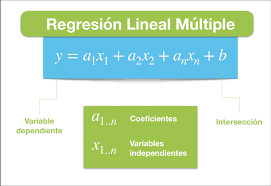

In [9]:
# y = B0 + B1 * X1 + B2 * X2 + ....

In [10]:
# Salario_Soles = B0 + B1 * Experiencia + B2 * Nivel Educativo + B3 * X3+ b4 * x4....

In [11]:
# Los algoritmos de ML necesitan que todas las variables que se utilicen para entrenar esten en formato numerico

# ¿Y si son categoricas?

# Label Encoding (Variable dependientes e independientes cualitativa): Nivel Educativo : Secundaria, Tecnico, Universitario
#                  Nivel Educativo : 1, 2, 3

# One Hot Encoding (Variables independientes) : Nivel Educativo : Secundaria, Tecnico, Universitario
#.                 Nivel_educativo_secundaria : 1 (Si) / 0 (No)
#                  Nivel_educativo_Tecnico : 1 (Si) / O (No)

# Analizar la cantidad de registros (%) que tiene cada categoria

# Secundaria 79%, Tecnica 11%, Universitaria (3%), Maestria 3%, Doctorado 4%

# **Análisis Descriptivo**

In [12]:
# Objetivo del análisis descriptivo, entender como se estan comportando todas las variables de mi base de datos (Univariado)
# Objetivo entender si hay relaciones de las variables independientes vs la dependiente desde su comportamiento historico (Multivariado)

**Análisis Univariado**

    Variables Cuantitativas

In [13]:
data.describe() # describe es una funcion para tener un reporte estadistico basico rapidamente

,Experiencia,Evaluacion_Desempeno,Horas_Semanales,Edad,Anos_en_la_Empresa,Titulo_Universitario,Nivel_Competencias,Salario_Soles
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,9.746000,5.502136,44.573000,43.308000,7.469000,0.505000,5.461683,6442.400000
std,5.651497,2.575975,8.665204,12.255584,4.035012,0.500225,2.619626,1648.447639
min,1.000000,1.014086,30.000000,22.000000,1.000000,0.000000,1.012855,2500.000000
25%,5.000000,3.325307,37.000000,33.000000,4.000000,0.000000,3.181642,5300.000000
50%,9.000000,5.561551,45.000000,43.000000,7.000000,1.000000,5.423808,6500.000000
75%,15.000000,7.697160,52.000000,53.000000,11.000000,1.000000,7.851143,7600.000000
max,19.000000,9.985128,59.000000,64.000000,14.000000,1.000000,9.995146,10500.000000


array([[<Axes: title={'center': 'Experiencia'}>,
        <Axes: title={'center': 'Evaluacion_Desempeno'}>,
        <Axes: title={'center': 'Horas_Semanales'}>],
       [<Axes: title={'center': 'Edad'}>,
        <Axes: title={'center': 'Anos_en_la_Empresa'}>,
        <Axes: title={'center': 'Titulo_Universitario'}>],
       [<Axes: title={'center': 'Nivel_Competencias'}>,
        <Axes: title={'center': 'Salario_Soles'}>, <Axes: >]],
      dtype=object)

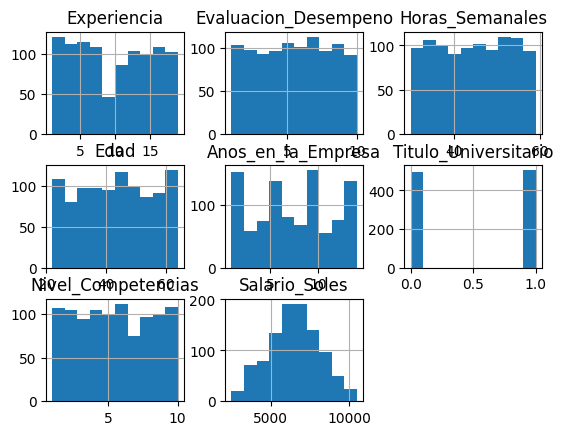

In [14]:
data.hist()

array([[<Axes: title={'center': 'Experiencia'}>,
        <Axes: title={'center': 'Evaluacion_Desempeno'}>,
        <Axes: title={'center': 'Horas_Semanales'}>],
       [<Axes: title={'center': 'Edad'}>,
        <Axes: title={'center': 'Anos_en_la_Empresa'}>,
        <Axes: title={'center': 'Titulo_Universitario'}>],
       [<Axes: title={'center': 'Nivel_Competencias'}>,
        <Axes: title={'center': 'Salario_Soles'}>, <Axes: >]],
      dtype=object)

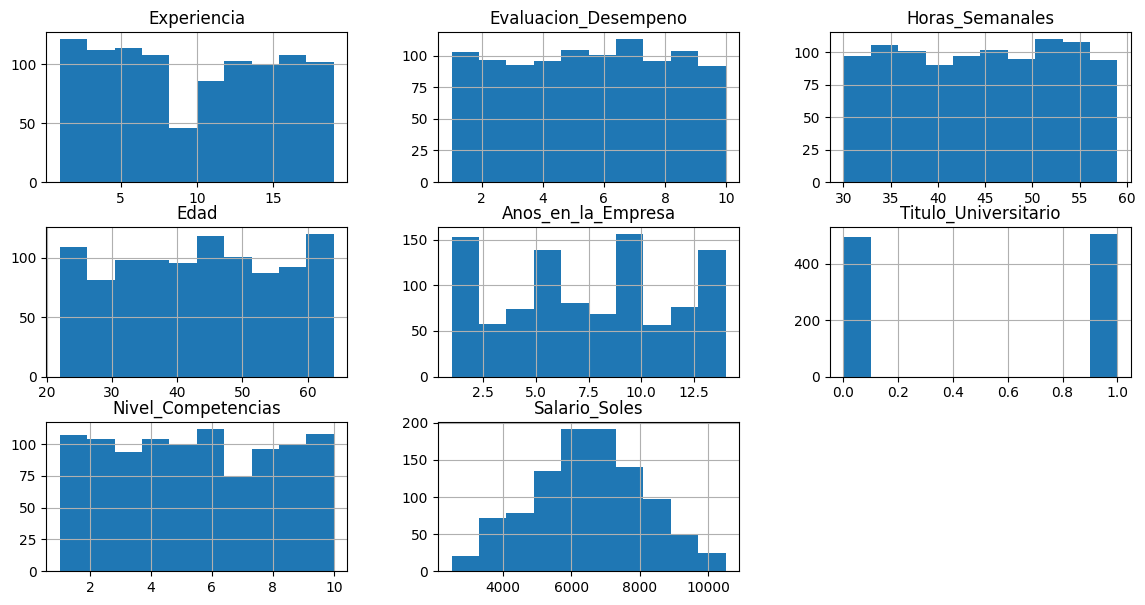

In [15]:
data.hist(figsize=(14,7)) # hist() funcion para hacer histogramas a todas las variables cuantitativas de tu data

<Axes: ylabel='Salario_Soles'>

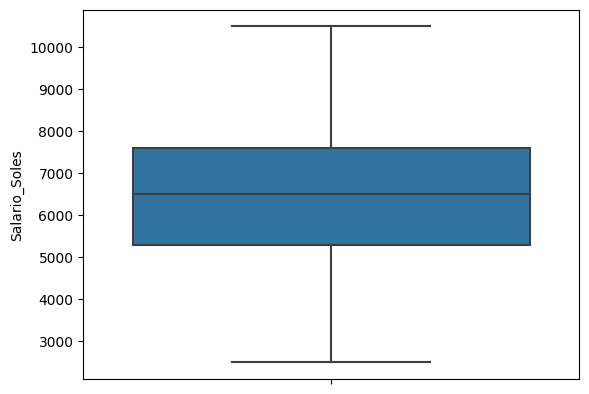

In [16]:
sns.boxplot(y="Salario_Soles", data=data) # sns es seaborn, boxplot generar grafica de cajas

In [17]:
data["Salario_Soles"].median()

6500.0

In [18]:
data["Salario_Soles"].describe()

count     1000.000000
mean      6442.400000
std       1648.447639
min       2500.000000
25%       5300.000000
50%       6500.000000
75%       7600.000000
max      10500.000000
Name: Salario_Soles, dtype: float64

    Variables cualitativas

In [19]:
data.describe(include=['O']) # data.describe()--> include = ["O"] ... Object

,Nivel_Educativo,Genero,Departamento
count,1000,1000,1000
unique,3,2,4
top,Grado,Hombre,TI
freq,343,515,268


In [20]:
data["Nivel_Educativo"].value_counts() #value_counts() es un contador de personas según su nivel de instrucción

Grado        343
Maestria     336
Doctorado    321
Name: Nivel_Educativo, dtype: int64

In [21]:
data["Nivel_Educativo"].value_counts(normalize = True) *100

Grado        34.3
Maestria     33.6
Doctorado    32.1
Name: Nivel_Educativo, dtype: float64

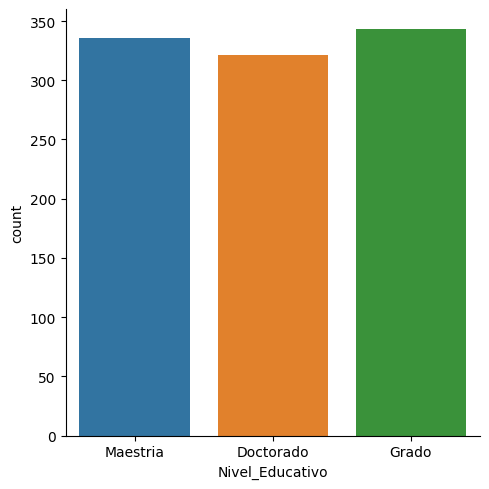

In [22]:
sns.catplot(x ='Nivel_Educativo', kind='count', data=data) # seaborn (sns)

**Análisis Multivariado**

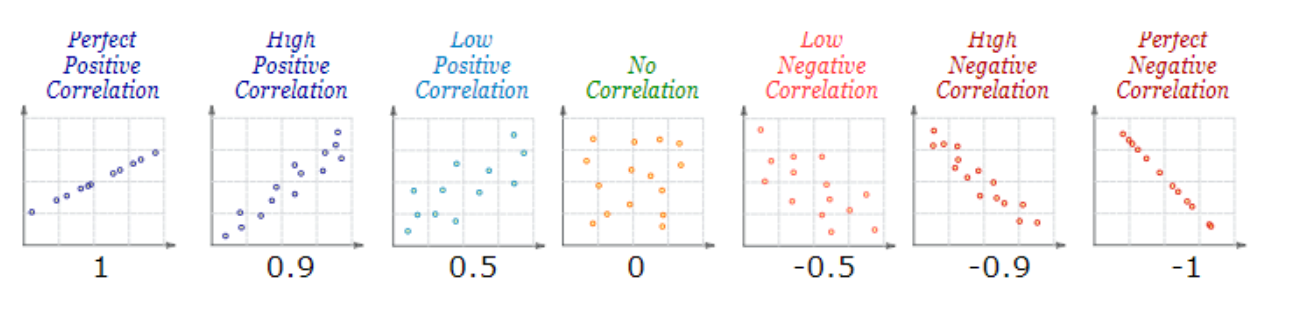

In [23]:
data.columns # columns que me muestra el nombre exacto de las variables de mi base de datos

Index(['Experiencia', 'Nivel_Educativo', 'Evaluacion_Desempeno',
       'Horas_Semanales', 'Edad', 'Genero', 'Departamento',
       'Anos_en_la_Empresa', 'Titulo_Universitario', 'Nivel_Competencias',
       'Salario_Soles'],
      dtype='object')

<Axes: xlabel='Salario_Soles', ylabel='Experiencia'>

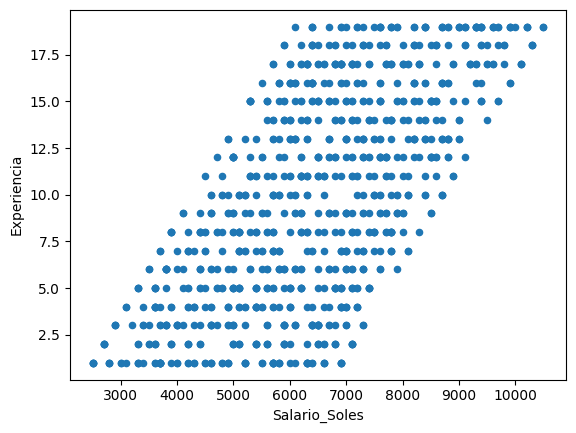

In [24]:
# ¿Hay relacion entre los años de experiencia y el salario en soles?

data.plot.scatter(x="Salario_Soles", y="Experiencia") # scatter es la funcion de la grafica de dispersion

<Axes: xlabel='Salario_Soles', ylabel='Evaluacion_Desempeno'>

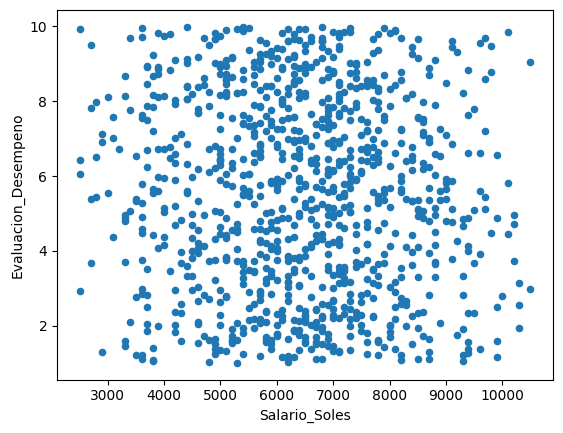

In [25]:
data.plot.scatter(x="Salario_Soles", y="Evaluacion_Desempeno")

<Axes: xlabel='Salario_Soles', ylabel='Anos_en_la_Empresa'>

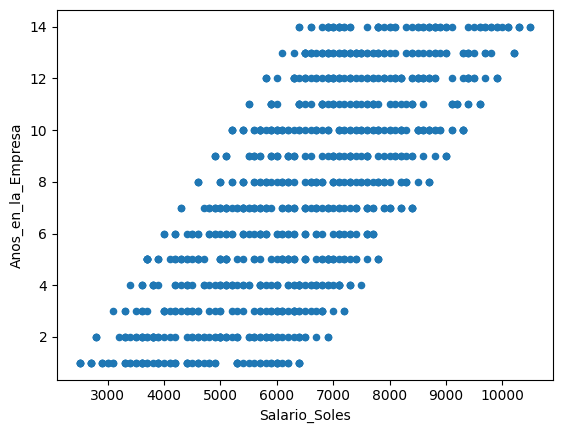

In [26]:
data.plot.scatter(x="Salario_Soles", y="Anos_en_la_Empresa")

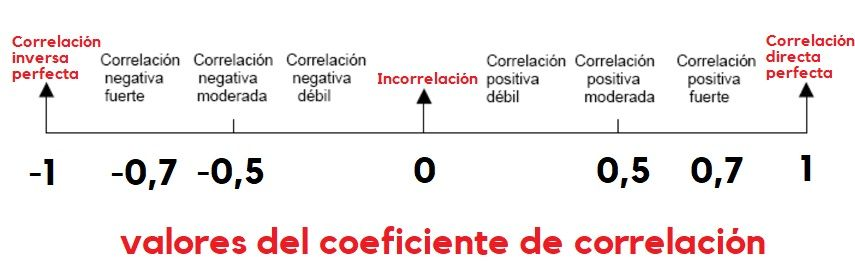

<ipython-input-27-32ed8718fecf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = data.corr()) # .corr() calcula el coeficiente de correlacion de pearson


<Axes: >

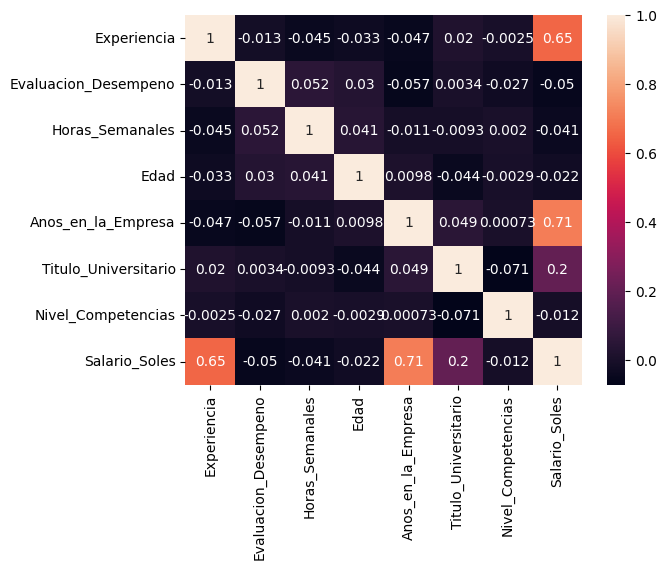

In [27]:
sns.heatmap(data.corr(), annot = data.corr()) # .corr() calcula el coeficiente de correlacion de pearson

# **Modelo de Regresión**

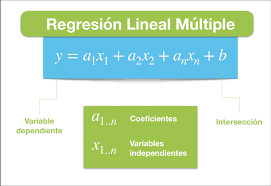

In [28]:
#¿Cómo quedaría nuestra ecuación?

# Salario_soles = B0 + B1 * Experiencia + B2 * Años en la empresa

In [29]:
import statsmodels.api as sm # Statsmodels

In [31]:
#Definir en python cuales son mis variables independientes (X)

X = data[["Experiencia", "Anos_en_la_Empresa"]]

In [32]:
X

,Experiencia,Anos_en_la_Empresa
0,7,4
1,15,1
2,11,6
3,8,5
4,7,10
...,...,...
995,1,2
996,8,7
997,7,4
998,3,2


In [33]:
X = sm.add_constant(X) #add_constant crear una columna de 1s (constante) para que modelo de regresion te pueda mostrar el B0

In [34]:
X

,const,Experiencia,Anos_en_la_Empresa
0,1.0,7,4
1,1.0,15,1
2,1.0,11,6
3,1.0,8,5
4,1.0,7,10
...,...,...,...
995,1.0,1,2
996,1.0,8,7
997,1.0,7,4
998,1.0,3,2


In [35]:
# Variable dependiente (y)

y = data[["Salario_Soles"]]

In [36]:
y

,Salario_Soles
0,5100
1,5300
2,6000
3,5100
4,6400
...,...
995,3300
996,5700
997,5100
998,3700


**Partición de la data**

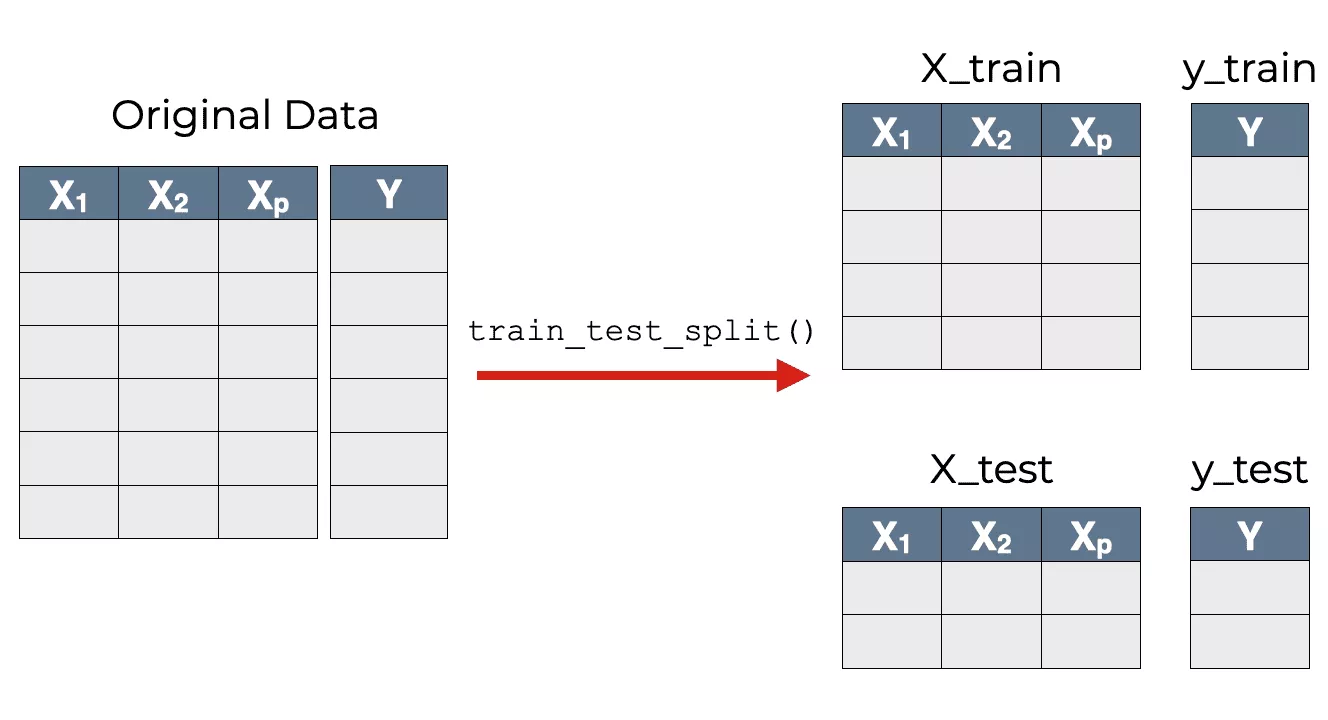

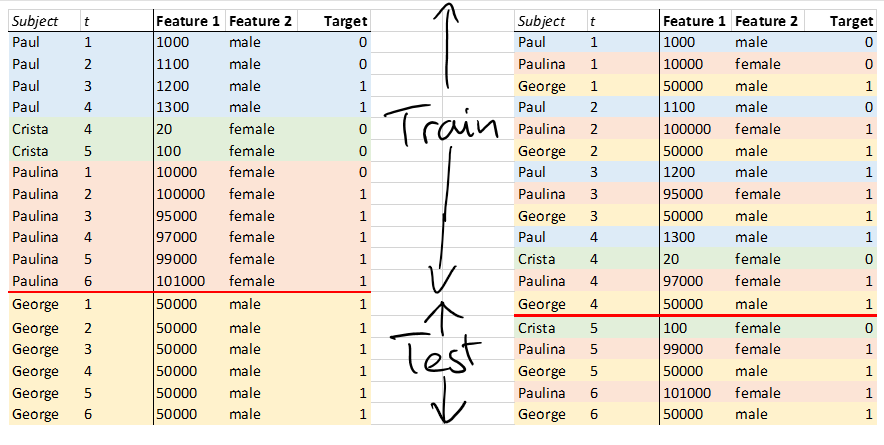

In [37]:
from sklearn.model_selection import train_test_split #sklearn tiene gran cantidad de funciones para todo lo relacionado al ML

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # random state y seed metodo aleatorio simple

In [39]:
X.shape # shape filas y columnas

(1000, 3)

In [40]:
X_train.shape

(800, 3)

In [41]:
X_test.shape

(200, 3)

In [42]:
y.shape

(1000, 1)

In [43]:
y_train.shape

(800, 1)

In [44]:
y_test.shape

(200, 1)

In [45]:
# Definir el modelo

modelo = sm.OLS(y_train, X_train) # Ordinary Least Squares : Metodo de los Minimos Cuadrados Ordinarios (Analisis de Regresion)

In [46]:
# Entrenamos el modelo

resultados = modelo.fit() # fit es la funcion de entrenamiento de modelos de ML

In [47]:
print(resultados.summary()) # Imprimir o mostrar un resumen del modelo de Regresion que he creado

                            OLS Regression Results                            
Dep. Variable:          Salario_Soles   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 1.642e+04
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:39:40   Log-Likelihood:                -5550.4
No. Observations:                 800   AIC:                         1.111e+04
Df Residuals:                     797   BIC:                         1.112e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2203.7278     24

In [48]:
# Interpretación

In [49]:
# ¿Cómo interpretamos la columna p-valor?

# Si el valor de p de la variable es menor o igual a 0.05, entonces la variable es significativa para el modelo
# caso contrario (> 0.05) no lo es y por ende no deberia utilizarlo en el modelo
# Deberia volver a entrenar el algoritmo sin las variables significativas (Feature Selection)

**Validación**

In [50]:
from sklearn.metrics import r2_score # modulo llamado metrics el cual me va a permitir obtener distintos indicadores de calidad

In [51]:
# Proceso de validación

# 1. Entreno mi modelo y obtengo un R2 de train
# 2. Obtener un R2 de Test
#.   2.1 Generando una prediccion de y (y_pred) con el modelo entrenado sobre tu data X_test
#    2.2 Comparar el resultado predicho del test (y_pred) con la data real (y_test)
#.   2.3 Obtendra el R2 de Test

In [52]:
y_test

,Salario_Soles
534,8900
736,4500
385,4400
376,5100
391,5800
...,...
127,6900
892,3600
278,2800
840,8800


In [53]:
X_test

,const,Experiencia,Anos_en_la_Empresa
534,1.0,17,10
736,1.0,8,3
385,1.0,2,5
376,1.0,2,9
391,1.0,1,12
...,...,...,...
127,1.0,7,10
892,1.0,4,1
278,1.0,1,2
840,1.0,18,9


In [54]:
y_pred = resultados.predict(X_test) # predict me genera una prediccion en este caso sobre la data de var. independientes del testeo

In [55]:
y_pred

534    8672.200665
736    4730.238476
385    4124.585779
376    5337.979037
391    6045.965759
          ...     
127    6651.618456
892    3315.308963
278    3012.482615
840    8570.910571
790    5742.095479
Length: 200, dtype: float64

In [56]:
r2_statsmodels = r2_score(y_pred, y_test)

In [57]:
r2_statsmodels # R2 de la data de testeo

0.9795807971414593

In [58]:
#¿Hay consistencia en los resultados de R2 de train y test?

# Cuando los valores de R2 son similares en el train y el test (Se cumplio)

# R2 train 0.976 y R2 test 0.75 --> Overfitting (Sobreajuste)

In [59]:
df_test = pd.concat([X_test,y_test], axis=1)

In [60]:
df_test.head()

,const,Experiencia,Anos_en_la_Empresa,Salario_Soles
534,1.0,17,10,8900
736,1.0,8,3,4500
385,1.0,2,5,4400
376,1.0,2,9,5100
391,1.0,1,12,5800


In [61]:
df_test["y_pred_lineal"] = y_pred

In [62]:
df_test.head(20)

,const,Experiencia,Anos_en_la_Empresa,Salario_Soles,y_pred_lineal
534,1.0,17,10,8900,8672.200665
736,1.0,8,3,4500,4730.238476
385,1.0,2,5,4400,4124.585779
376,1.0,2,9,5100,5337.979037
391,1.0,1,12,5800,6045.965759
909,1.0,14,11,8100,8369.374316
337,1.0,10,12,8100,7864.489747
761,1.0,6,1,3500,3719.425405
979,1.0,13,12,8700,8470.664410
251,1.0,19,10,8800,9076.317106


# **Simulador de Regresión**

In [63]:
# Salario_soles = B0 + B1 * X1 + B2 * X2

# Salario_soles = 2223.7164 + 200.0765  * Experiencia + 303.9524   * Años en la Empresa

In [64]:
Experiencia = 8
Años_en_la_empresa = 7

In [65]:
Salario_soles = 2223.7164 + 200.0765  * Experiencia + 303.9524   * Años_en_la_empresa

In [66]:
Salario_soles

5951.995199999999

In [67]:
# R2 es el coeficiente de determinacion (el cual me permite medir el nivel de predictibilidad de mi modelo)
# ?

# **Otras Opciones de Modelo de Regresión**

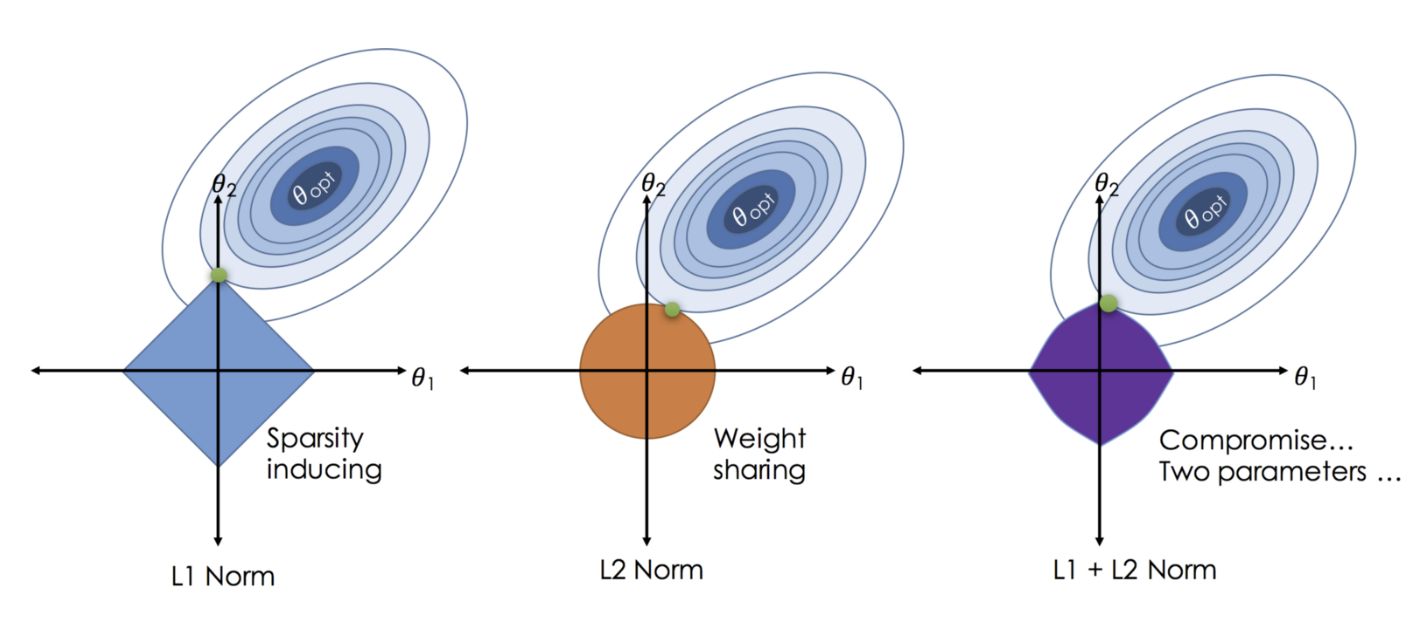

In [68]:
from sklearn.linear_model import Ridge # OLS mejorado (que tiene un factor llamado regularizacion)
from sklearn.linear_model import Lasso # OLS mejorado (que tiene un factor llamado regularizacion)
from sklearn.linear_model import ElasticNet # OLS mejorado (que en teoria tiene mas factores de regularizacion)
from sklearn.ensemble import RandomForestRegressor # Modelo computacional no tiene una ecuacion

Regresión Lineal con Regularización Ridge

In [69]:
modelo_RG = Ridge() # Definir el modelo de Ridge

modelo_RG.fit(X = X_train, y = y_train) # Entrenar el modelo de Ridge

Ridge()

In [70]:
# Proceso de obtencion del R2 de testeo

# 1. Entrenar el modelo con X_train e y_train
# 2. Hacer predicciones con tu modelo entrenado sobre la data de X_test
# 3. Calcular el R2 de testeo comparando el y_test (real) vs y_pred (prediccion)

# Comparar los R2 de testeo de los diferentes algoritmos que estoy ejecutando

# R2 del modelo del OLS, R2 del modelo de Ridge, R2 del modelo ElasticNet, R2 del modelo Random Forest

In [71]:
predicciones = modelo_RG.predict(X=X_test)

In [72]:
predicciones = predicciones.flatten()

In [73]:
r2_ridge = r2_score(y_test, predicciones)

In [74]:
r2_ridge

0.9794847486811469

Regresión con Regularización ElasticNet

In [75]:
modelo_EL = ElasticNet()

modelo_EL.fit(X = X_train, y = y_train)

ElasticNet()

In [76]:
predicciones_EL = modelo_EL.predict(X = X_test)
predicciones_EL = predicciones_EL.flatten()

In [77]:
r2_elastic = r2_score(y_test, predicciones_EL)

In [78]:
r2_elastic

0.9792695828715481

Regresión con Random Forest

In [79]:
regressor = RandomForestRegressor()
regressor.fit(X = X_train, y = y_train) # SHAP - SHAP VALUE (Ranking de aporte de las variables)

<ipython-input-79-d79bf8b959b4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X = X_train, y = y_train) # SHAP - SHAP VALUE (Ranking de aporte de las variables)


RandomForestRegressor()

In [80]:
# Objetivo dentro del proceso de modelamiento : TENER EL MEJOR MODELO DE REGRESION

# Seleccione el algoritmo que me traiga un mejor R2 (R2 test)

In [81]:
predicciones_RF = regressor.predict(X = X_test)


In [82]:
predicciones_RF

array([ 8757.55082418,  4751.5       ,  4001.83333333,  5430.56349206,
        6189.65836941,  8504.58333333,  7856.69246032,  3717.17857143,
        8394.8452381 ,  9218.74206349,  6639.33928571,  6447.55952381,
        6073.68849206,  6225.44119769,  8326.89072039,  8881.16666667,
        6484.33261183,  5006.30555556,  8146.13888889,  5805.33333333,
        5430.56349206,  7602.        ,  6225.70238095,  5669.10642136,
        6140.5       ,  6610.75671551,  6189.65836941,  7418.66468254,
        3759.27219308,  5147.22619048,  5147.22619048,  3632.25      ,
        6842.17568543,  5377.02380952,  9401.16666667,  7446.46428571,
        4620.5       ,  5290.10912698,  8326.89072039,  9425.57142857,
        7434.75      ,  6557.61111111,  8730.35515873,  4620.5       ,
        5262.90079365,  3748.89285714,  5457.42857143,  5147.22619048,
        5978.46861472,  5457.42857143,  6293.92857143,  7612.55357143,
        6189.65836941,  5098.        ,  3377.05952381,  5457.42857143,
      

In [83]:
predicciones_RF = predicciones_RF.flatten()

In [84]:
predicciones_RF

array([ 8757.55082418,  4751.5       ,  4001.83333333,  5430.56349206,
        6189.65836941,  8504.58333333,  7856.69246032,  3717.17857143,
        8394.8452381 ,  9218.74206349,  6639.33928571,  6447.55952381,
        6073.68849206,  6225.44119769,  8326.89072039,  8881.16666667,
        6484.33261183,  5006.30555556,  8146.13888889,  5805.33333333,
        5430.56349206,  7602.        ,  6225.70238095,  5669.10642136,
        6140.5       ,  6610.75671551,  6189.65836941,  7418.66468254,
        3759.27219308,  5147.22619048,  5147.22619048,  3632.25      ,
        6842.17568543,  5377.02380952,  9401.16666667,  7446.46428571,
        4620.5       ,  5290.10912698,  8326.89072039,  9425.57142857,
        7434.75      ,  6557.61111111,  8730.35515873,  4620.5       ,
        5262.90079365,  3748.89285714,  5457.42857143,  5147.22619048,
        5978.46861472,  5457.42857143,  6293.92857143,  7612.55357143,
        6189.65836941,  5098.        ,  3377.05952381,  5457.42857143,
      

In [85]:
r2_RF = r2_score(y_test, predicciones_RF)

In [86]:
r2_RF

0.9758215385968132

# **Comparación del mejor modelo en base al R2**

In [87]:
# Comparamos los 4 modelos

df_comparacionr2 = pd.DataFrame({
    "modelo":["Statsmodels","Ridge","Elastic-net","Random Forest"],
    "r2-test":[r2_statsmodels,r2_ridge,r2_elastic, r2_RF]
})

In [88]:
df_comparacionr2

,modelo,r2-test
0,Statsmodels,0.979581
1,Ridge,0.979485
2,Elastic-net,0.979270
3,Random Forest,0.975822


# El mejor sistema es el de Statsmodel (al profesor le salio que era el random Forest)
## el resultado varia porque no hemos escogido un seed.